## Predicting the College enrollment rates of students in New Mexico using gathered yearly data from 1961 - 1989

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

import seaborn as sb
sb.set_style('whitegrid')

In [3]:
address = r"C:\Users\Raimi Anda\Data_Science_Scripts\Linear Regression\enrollment_forecast.csv"
enroll = pd.read_csv(address, header=0)
enroll

,year,roll,unem,hgrad,inc
0,1961,5501,8.1,9552,1923
1,1962,5945,7.0,9680,1961
2,1963,6629,7.3,9731,1979
3,1964,7556,7.5,11666,2030
4,1965,8716,7.0,14675,2112
5,1966,9369,6.4,15265,2192
6,1967,9920,6.5,15484,2235
7,1968,10167,6.4,15723,2351
8,1969,11084,6.3,16501,2411
9,1970,12504,7.7,16890,2475


### Dataset Description 
#### Sample data from New Mexico
* year: The year when the data was collected
* roll: Number of enrollments in that year --- This is the target variable (Predicting enrollments)
* unem: Local unemployment rate in that year
* hgrad: Graduation rate
* inc: Local income in the region during that year

### Verify the assumptions of the Linear Regression Model
* Free of missing values & outliers
* Linear relationship between the predictor (roll) & the predictants (unem, hgrad, inc)
* Predictors are independent of each other

## Missing Values

In [4]:
enroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
year     29 non-null int64
roll     29 non-null int64
unem     29 non-null float64
hgrad    29 non-null int64
inc      29 non-null int64
dtypes: float64(1), int64(4)
memory usage: 1.3 KB


## Linear Relationship Check

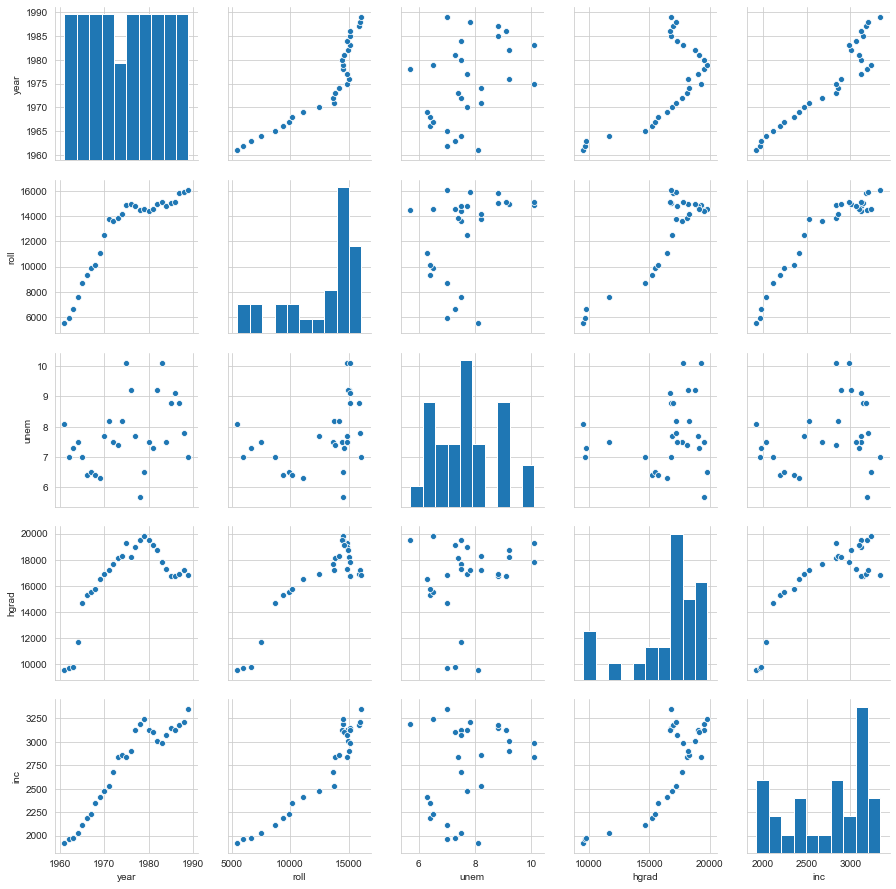

In [5]:
sb.pairplot(enroll)

## Test for Independence

In [6]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


(5.0, 0)

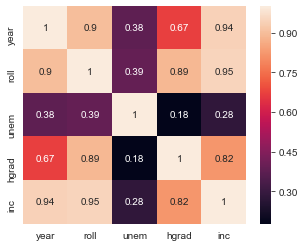

In [7]:
ax = sb.heatmap(enroll.corr(), annot=True)
ax.set_ylim(5.0,0)

## Results
- Dataset has no missing records
- Predictants('hgrad' and 'unem') are linearly related to the predictor ('roll')
- hgrad and unem are independent of each other

#### Splitting the predictants and the predictor

In [8]:
enroll_data = enroll[['unem', 'hgrad']].values

enroll_target = enroll[['roll']].values

x, y = scale(enroll_data), enroll_target

In [9]:
print(x)

[[ 0.34682081 -2.42562243]
 [-0.64989846 -2.38111647]
 [-0.37806593 -2.36338363]
 [-0.19684425 -1.69057879]
 [-0.64989846 -0.64434118]
 [-1.19356352 -0.43919655]
 [-1.10295268 -0.36304964]
 [-1.19356352 -0.27994868]
 [-1.28417436 -0.00943593]
 [-0.01562256  0.12582044]
 [ 0.43743166  0.23465141]
 [-0.19684425  0.4098936 ]
 [-0.28745509  0.5493224 ]
 [ 0.43743166  0.60425944]
 [ 2.15903768  0.96656572]
 [ 1.34354009  0.58965593]
 [-0.01562256  0.85843016]
 [-1.82783942  1.03506316]
 [-1.10295268  1.13763548]
 [-0.19684425  1.04931898]
 [-0.37806593  0.90015449]
 [ 1.34354009  0.78089244]
 [ 2.15903768  0.44675009]
 [-0.19684425  0.26976938]
 [ 0.98109672  0.07922827]
 [ 1.25292925  0.07679435]
 [ 0.98109672  0.13799004]
 [ 0.07498828  0.24438708]
 [-0.64989846  0.10009044]]


In [10]:
print(y)

[[ 5501]
 [ 5945]
 [ 6629]
 [ 7556]
 [ 8716]
 [ 9369]
 [ 9920]
 [10167]
 [11084]
 [12504]
 [13746]
 [13656]
 [13850]
 [14145]
 [14888]
 [14991]
 [14836]
 [14478]
 [14539]
 [14395]
 [14599]
 [14969]
 [15107]
 [14831]
 [15081]
 [15127]
 [15856]
 [15938]
 [16081]]


#### Applying the LinearRegression Model on the dataset

In [11]:
LinReg = LinearRegression(normalize=True)
LinReg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

#### Evaluating the Model (R-Squared Value) - How well the model performs in predicting college enrollment in New Mexico

In [12]:
print(LinReg.score(x, y))

0.8488812666133723
